In [74]:
%reload_ext autoreload
%autoreload 2

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pickle as pkl
import pandas as pd
import numpy as np
import random
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from de_ml_functions import prep_data, custom_train_test_split, train_models, train_models_boot_data, plot_model_scores, subplot_plot_model_scores
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Re-run this block to see the distributions change

In [2]:
# Load data
ml_df, donor_ids, samples = prep_data()

In [9]:
ml_df

,rnaseq_profile_id,499309627,499315162,499315537,499315843,499317231,499317260,499319747,499322427,499323096,...,499336992,499342049,499343767,499343769,499347240,499348546,499348654,499350441,499352783,Condition
0,488395315,21,51,13,18,31,4,7,638,102,...,548,98,14,30,23,497,29,60,30,control
1,496100277,85,143,22,13,15,3,5,216,235,...,374,100,2,3,24,664,34,100,12,control
2,496100278,83,275,14,6,30,6,2,184,205,...,274,90,1,5,7,779,32,54,13,control
3,496100279,44,70,49,12,42,10,13,806,136,...,457,105,8,6,5,575,16,31,70,control
4,496100281,40,112,28,5,55,4,3,435,244,...,651,136,9,11,13,891,30,37,16,dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,496100667,53,87,103,23,73,8,39,1059,129,...,302,83,5,7,6,543,39,32,87,control
373,496100669,52,78,103,29,42,4,26,681,146,...,333,97,4,6,9,532,24,42,82,control
374,496100670,26,66,11,35,48,0,6,512,250,...,538,198,19,9,16,1101,55,54,28,dementia
375,496100671,56,117,124,11,46,11,21,648,169,...,308,128,2,6,10,575,26,53,23,control


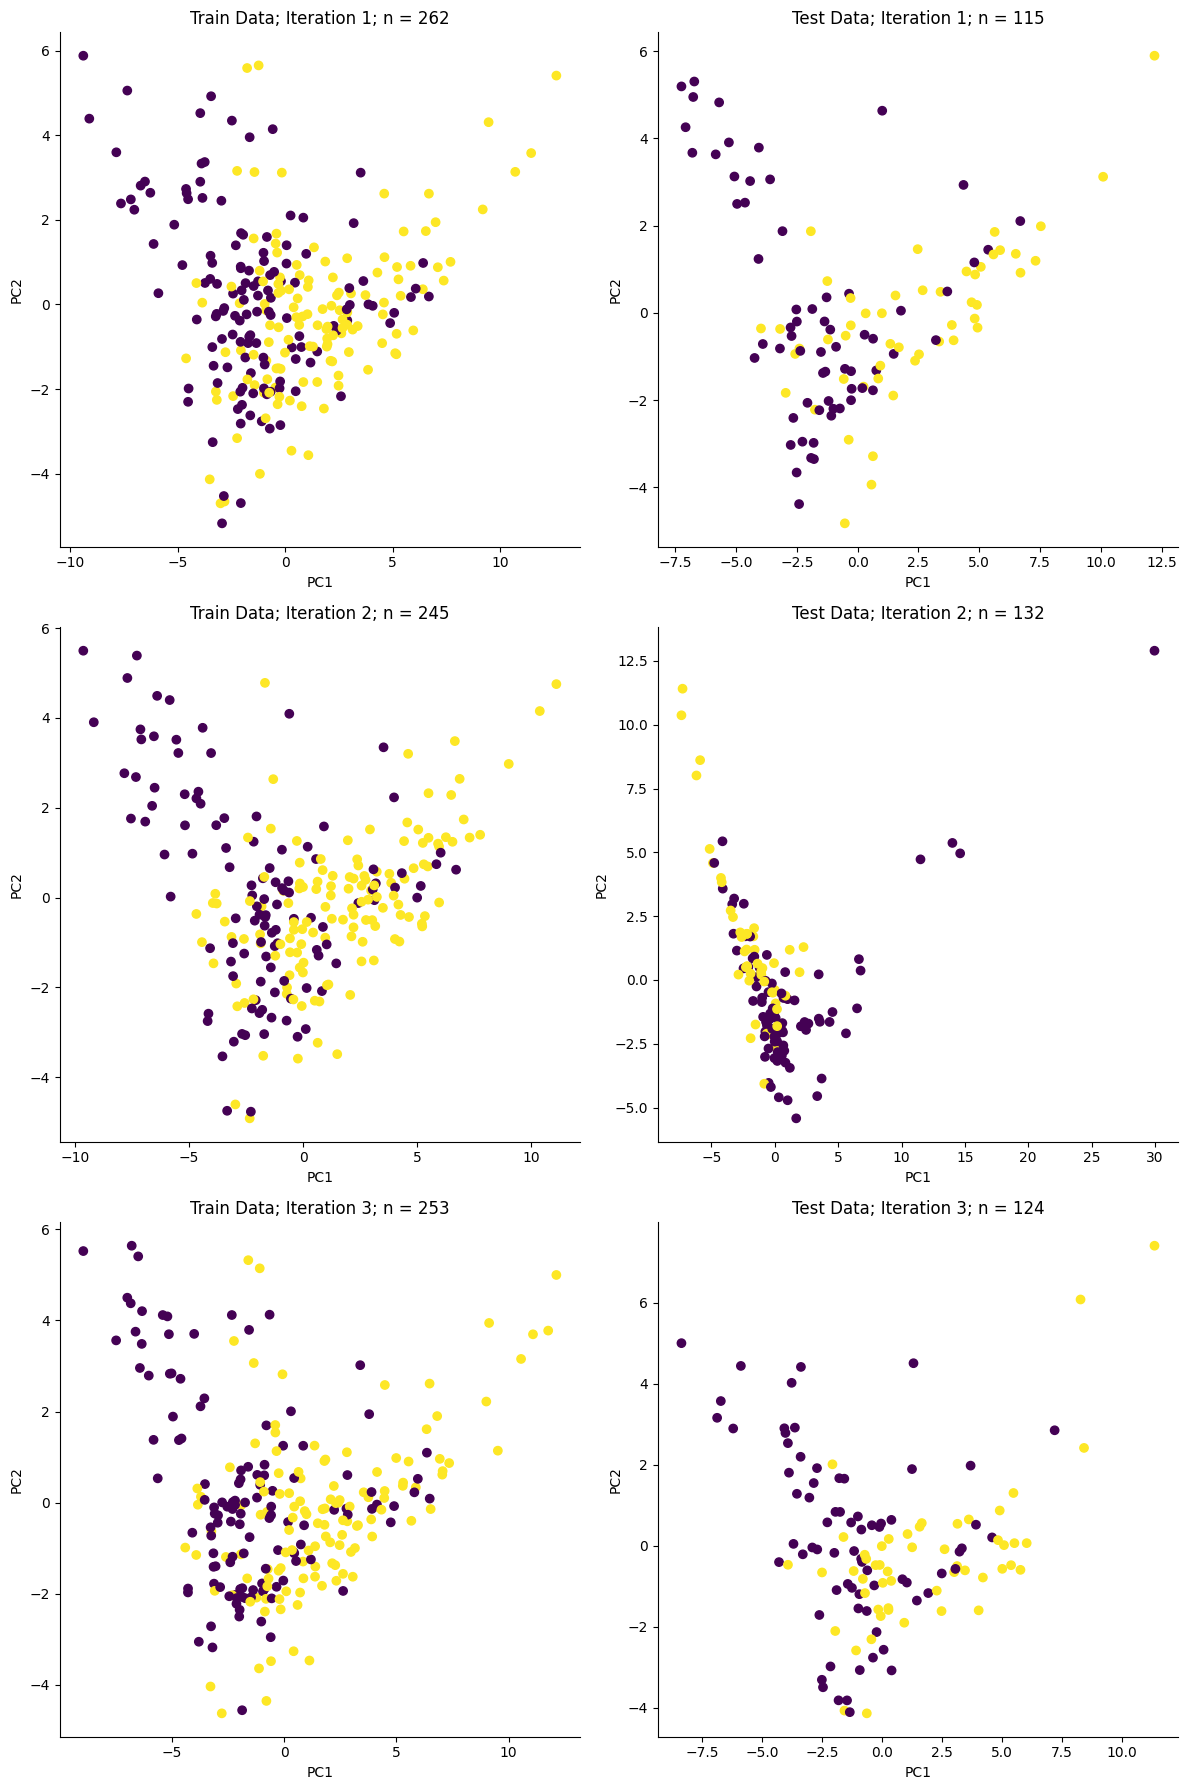

In [3]:

# Prep PCA
pca = PCA(n_components=2, random_state=42)

# Set the size of the plots and create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows, 2 columns

for i in range(1, 4):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df, donor_ids, samples)
    # Plot for Train Data
    X_train_pca = pca.fit_transform(X_train)
    axes[i - 1, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label=y_train)
    axes[i - 1, 0].set_xlabel('PC1')
    axes[i - 1, 0].set_ylabel('PC2')
    axes[i - 1, 0].set_title(f'Train Data; Iteration {i}; n = {X_train.shape[0]}')
    axes[i - 1, 0].spines['top'].set_visible(False)
    axes[i - 1, 0].spines['right'].set_visible(False)

    # Plot for Test Data
    X_test_pca = pca.fit_transform(X_test)
    axes[i - 1, 1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, label=y_test)
    axes[i - 1, 1].set_xlabel('PC1')
    axes[i - 1, 1].set_ylabel('PC2')
    axes[i - 1, 1].set_title(f'Test Data; Iteration {i}; n = {X_test.shape[0]}')
    axes[i - 1, 1].spines['top'].set_visible(False)
    axes[i - 1, 1].spines['right'].set_visible(False)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


## All Model on Boostrapped Data

In [4]:
# Define models to test
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(kernel="linear", random_state=42),
    SVC(kernel="rbf", random_state=42),
    GaussianNB(),
    GradientBoostingClassifier(random_state=42),
    # DummyClassifier(strategy="most_frequent", random_state=42),
]

# List of model_names for output
model_names = [
    "Log_Reg",
    "DT",
    "RF",
    "SVM_linear",
    "SVM_radial",
    "GaussianNB",
    "Gradient_boosted",
    # "Dummy_most_freq",
]

In [55]:
# model_scores = train_models_boot_data(ml_df,donor_ids, samples, models, model_names, 'F1')
# model_scores
# plot_model_scores(model_scores, ml_df, 'F1')

In [6]:
model_scores_dict = train_models_boot_data(ml_df,donor_ids, samples, models, model_names, iterations= 1000)
# model_scores_dict.keys()

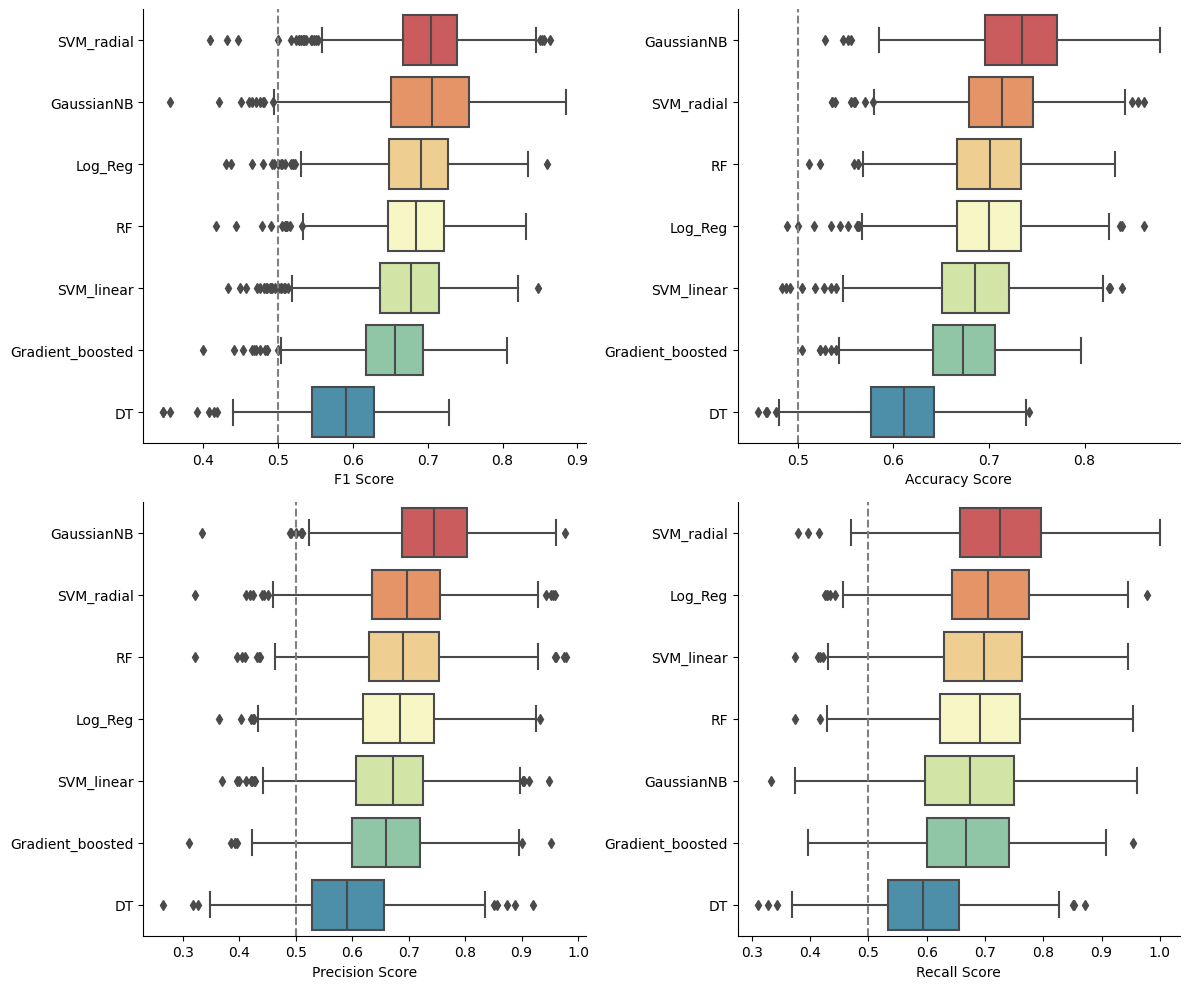

In [7]:
### PLOT

# # Assuming metrics is defined as before
metrics = ['F1', 'Accuracy', 'Precision', 'Recall']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through the metrics and plot on the corresponding subplot
for i, metric in enumerate(metrics):
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot

    # model_scores = train_models_boot_data(ml_df,donor_ids, samples, models, model_names, metric)


    # Call your function with the specified subplot
    subplot_plot_model_scores(model_scores_dict[metric], ml_df, metric, ax=axes[row, col])

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()

## Logistic Regression

# Run this block to train the model on shuffled data (by donor id)

In [155]:
train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_[0])

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training Logsitic Regession on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))


Training Logsitic Regession on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [0.8258, 0.8538, 0.787]
Test Scores (F1):  [0.7547, 0.5872, 0.6957]
mean Train:  0.8167
mean Test:  0.6818
Training std :  0.0293
Testing std :  0.0623


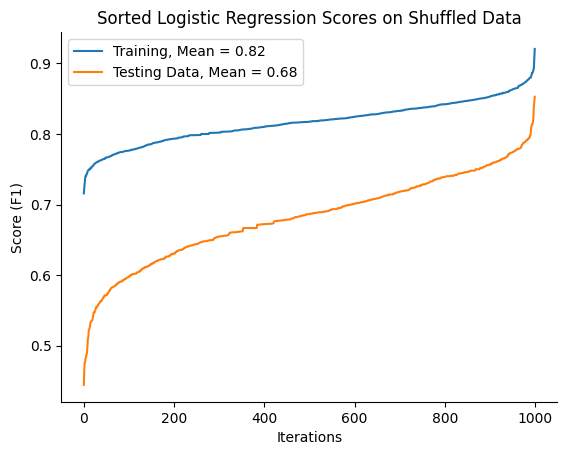

In [156]:
plt.plot(sorted(train_scores), label = f'Training, Mean = {np.round(np.mean(train_scores),2)}')
plt.plot(sorted(test_scores), label = f'Testing Data, Mean = {np.round(np.mean(test_scores),2)}')
plt.title('Sorted Logistic Regression Scores on Shuffled Data')
plt.ylabel('Score (F1)')
plt.xlabel('Iterations')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axhline(np.mean(train_scores),color="gray",linestyle="--")
plt.legend()
plt.show()

In [157]:
# X = ml_df.drop(columns=['rnaseq_profile_id', 'Condition'])
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = ml_df['Condition'].apply(lambda x: 1 if x == 'dementia' else 0)


In [202]:
coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

gene_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')
gene_list = np.array(ml_df.set_index('rnaseq_profile_id').columns[:-1])

gene_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(gene_list, coefs_mean)}, orient = 'index', columns= ['coef'])
.rename_axis('gene_id')
.reset_index()
.sort_values(by='coef', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

gene_ids_ranking
gene_ids_ranking['sem'] = coefs_sem
gene_ids_ranking = gene_ids_ranking.merge(gene_data, on='gene_id')
gene_ids_ranking

,gene_id,coef,sem,chromosome,gene_entrez_id,gene_symbol,gene_name
0,499317231,0.788601,0.009540,4,4085,MAD2L1,MAD2 mitotic arrest deficient-like 1 (yeast)
1,499334626,0.571163,0.009561,12,6539,SLC6A12,solute carrier family 6 (neurotransmitter tran...
2,499323096,0.502990,0.009952,7,79778,MICALL2,MICAL-like 2
3,499336992,0.419313,0.008776,12,5426,POLE,"polymerase (DNA directed), epsilon, catalytic ..."
4,499334295,0.417730,0.011505,11,283149,BCL9L,B-cell CLL/lymphoma 9-like
5,499343767,0.395385,0.007475,16,101927793,LOC101927793,uncharacterized LOC101927793
6,499329195,0.321150,0.010088,9,85301,COL27A1,"collagen, type XXVII, alpha 1"
7,499315843,0.246235,0.008928,4,285489,DOK7,docking protein 7
8,499352783,0.157208,0.007903,X,5475,PPEF1,"protein phosphatase, EF-hand calcium binding d..."
9,499322427,0.129810,0.007408,6,9729,KIAA0408,KIAA0408


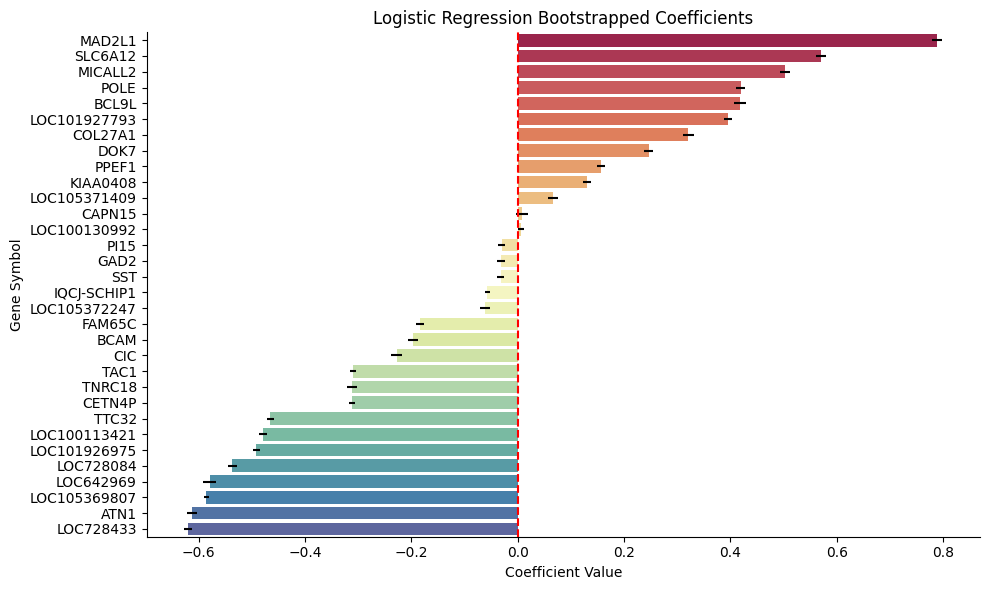

In [217]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y='gene_symbol', data=gene_ids_ranking, xerr=gene_ids_ranking['sem'], palette='Spectral')
plt.title('Logistic Regression Bootstrapped Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Gene Symbol')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

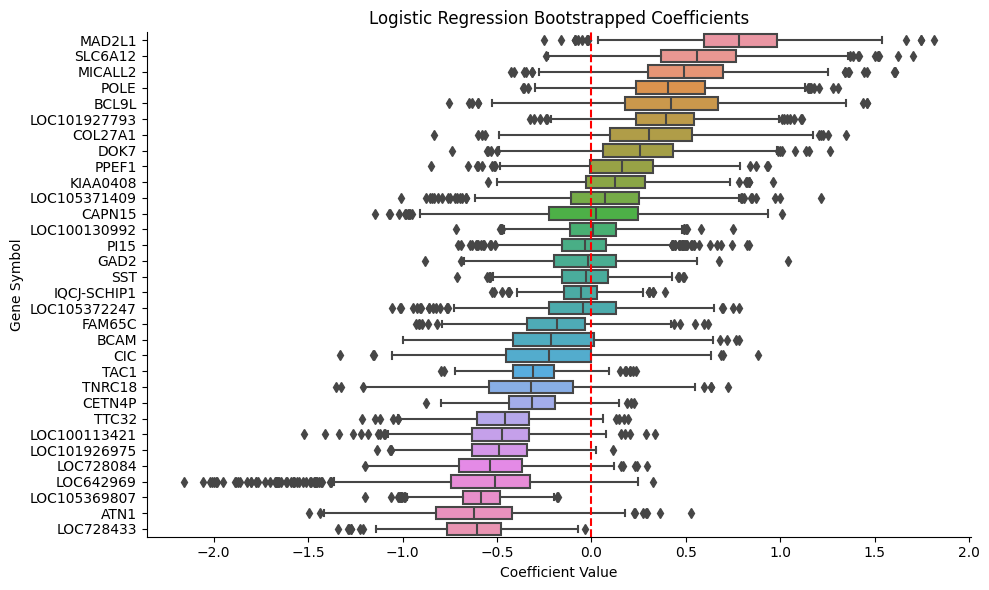

In [216]:
plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = gene_ids_ranking['gene_symbol']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('Logistic Regression Bootstrapped Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Gene Symbol')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

## Gaussian NB

In [220]:
train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

Training Logsitic Regession on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [0.7554, 0.7851, 0.7094]
Test Scores (F1):  [0.6847, 0.7143, 0.6863]
mean Train:  0.7326
mean Test:  0.7008
Training std :  0.0347
Testing std :  0.0752


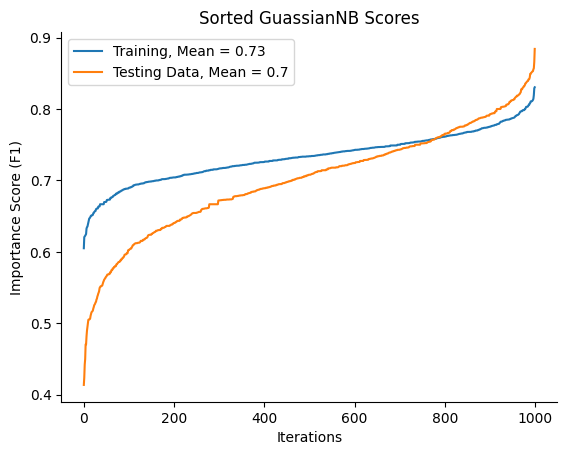

In [221]:
plt.plot(sorted(train_scores), label = f'Training, Mean = {np.round(np.mean(train_scores),2)}')
plt.plot(sorted(test_scores), label = f'Testing Data, Mean = {np.round(np.mean(test_scores),2)}')
plt.title('Sorted GuassianNB Scores')
plt.ylabel('Importance Score (F1)')
plt.xlabel('Iterations')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axhline(np.mean(train_scores),color="gray",linestyle="--")
plt.legend()
plt.show()

In [222]:
coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

gene_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')
gene_list = np.array(ml_df.set_index('rnaseq_profile_id').columns[:-1])

gene_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(gene_list, coefs_mean)}, orient = 'index', columns= ['coef'])
.rename_axis('gene_id')
.reset_index()
.sort_values(by='coef', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

gene_ids_ranking
gene_ids_ranking['sem'] = coefs_sem
gene_ids_ranking = gene_ids_ranking.merge(gene_data, on='gene_id')
# gene_ids_ranking

,gene_id,coef,sem,chromosome,gene_entrez_id,gene_symbol,gene_name
0,499328351,0.017000,0.000477,9,728433,LOC728433,fibroblast growth factor 7 pseudogene
1,499317260,0.016498,0.000379,4,729338,CETN4P,"centrin EF-hand protein 4, pseudogene"
2,499319747,0.015779,0.000382,5,101926975,LOC101926975,uncharacterized LOC101926975
3,499335939,0.015690,0.000393,12,105369807,LOC105369807,uncharacterized LOC105369807
4,499336276,0.013682,0.000555,12,642969,LOC642969,phosphoglycerate mutase 1 (brain) pseudogene
5,499326780,0.012719,0.000430,8,51050,PI15,peptidase inhibitor 15
6,499324505,0.010863,0.000433,7,6863,TAC1,"tachykinin, precursor 1"
7,499309627,0.010721,0.000408,2,130502,TTC32,tetratricopeptide repeat domain 32
8,499336206,0.010116,0.000418,12,728084,LOC728084,uncharacterized LOC728084
9,499315537,0.008511,0.000414,3,6750,SST,somatostatin


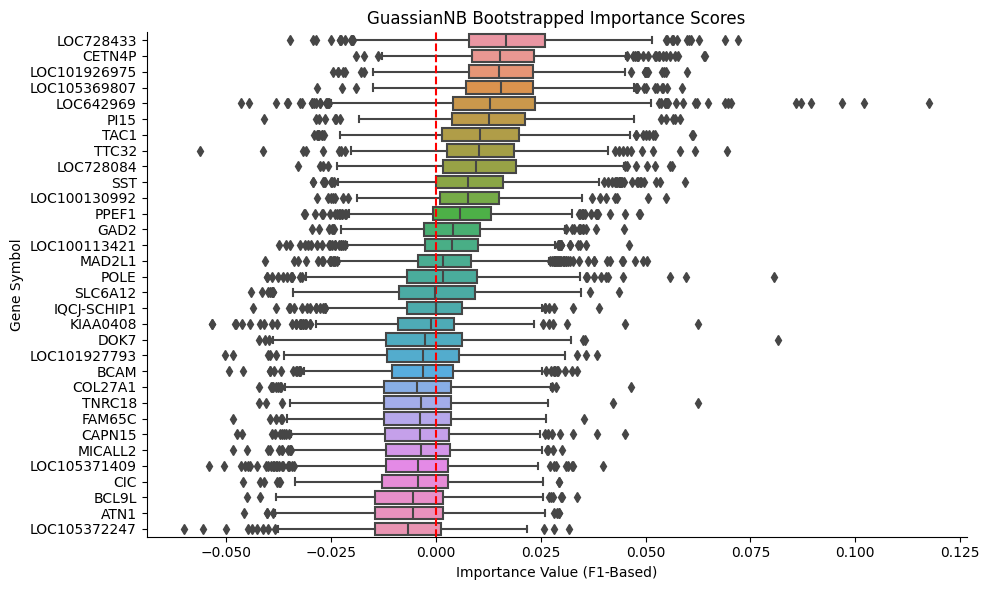

In [224]:
plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = gene_ids_ranking['gene_symbol']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('GuassianNB Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Gene Symbol')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

### SVM

In [225]:
train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)
    clf = SVC(kernel="rbf", random_state= 42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training SVM on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

Training SVM on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [0.8622, 0.8444, 0.8333]
Test Scores (F1):  [0.6901, 0.7521, 0.7167]
mean Train:  0.8472
mean Test:  0.7038
Training std :  0.0231
Testing std :  0.0571


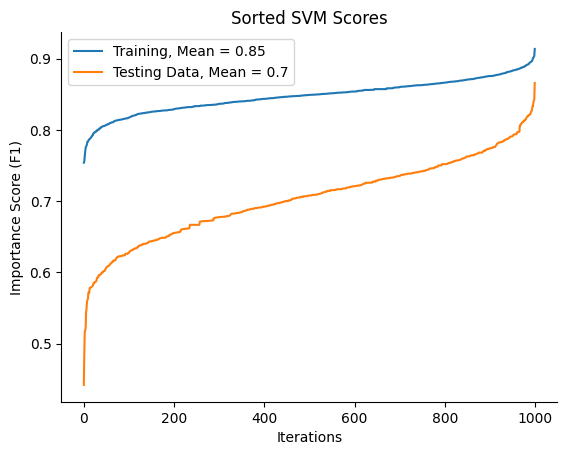

In [227]:
plt.plot(sorted(train_scores), label = f'Training, Mean = {np.round(np.mean(train_scores),2)}')
plt.plot(sorted(test_scores), label = f'Testing Data, Mean = {np.round(np.mean(test_scores),2)}')
plt.title('Sorted SVM Scores')
plt.ylabel('Importance Score (F1)')
plt.xlabel('Iterations')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axhline(np.mean(train_scores),color="gray",linestyle="--")
plt.legend()
plt.show()

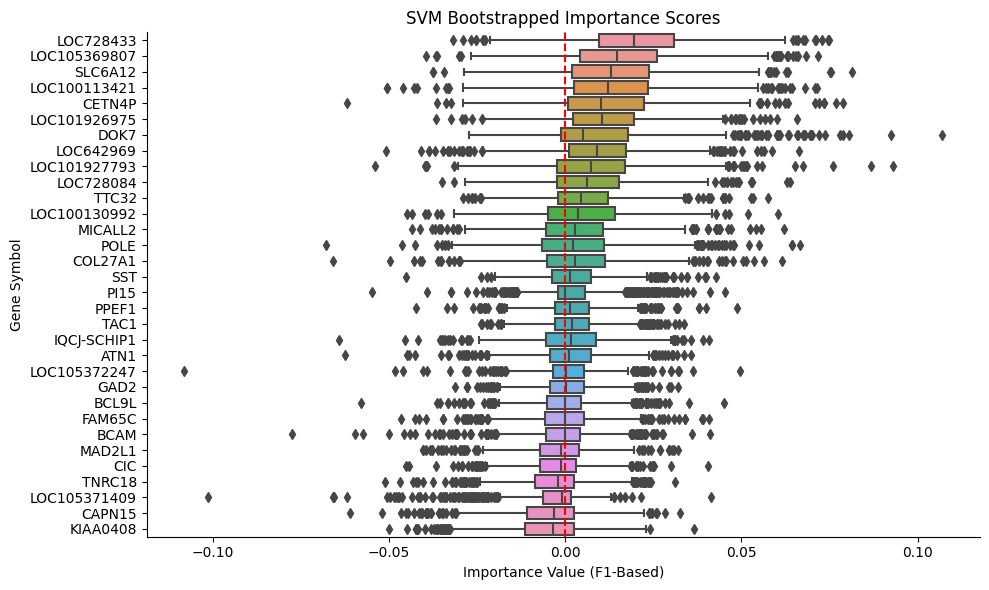

In [226]:
coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

gene_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')
gene_list = np.array(ml_df.set_index('rnaseq_profile_id').columns[:-1])

gene_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(gene_list, coefs_mean)}, orient = 'index', columns= ['coef'])
.rename_axis('gene_id')
.reset_index()
.sort_values(by='coef', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

gene_ids_ranking
gene_ids_ranking['sem'] = coefs_sem
gene_ids_ranking = gene_ids_ranking.merge(gene_data, on='gene_id')
# gene_ids_ranking

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = gene_ids_ranking['gene_symbol']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('SVM Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Gene Symbol')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

## Random Forest

Training on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [1.0, 1.0, 1.0]
Test Scores (F1):  [0.7, 0.5505, 0.6393]
mean Train:  1.0
mean Test:  0.6806
Training std :  0.0
Testing std :  0.0581


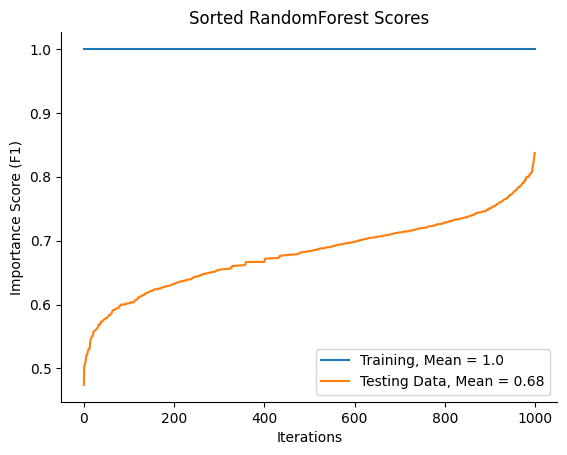

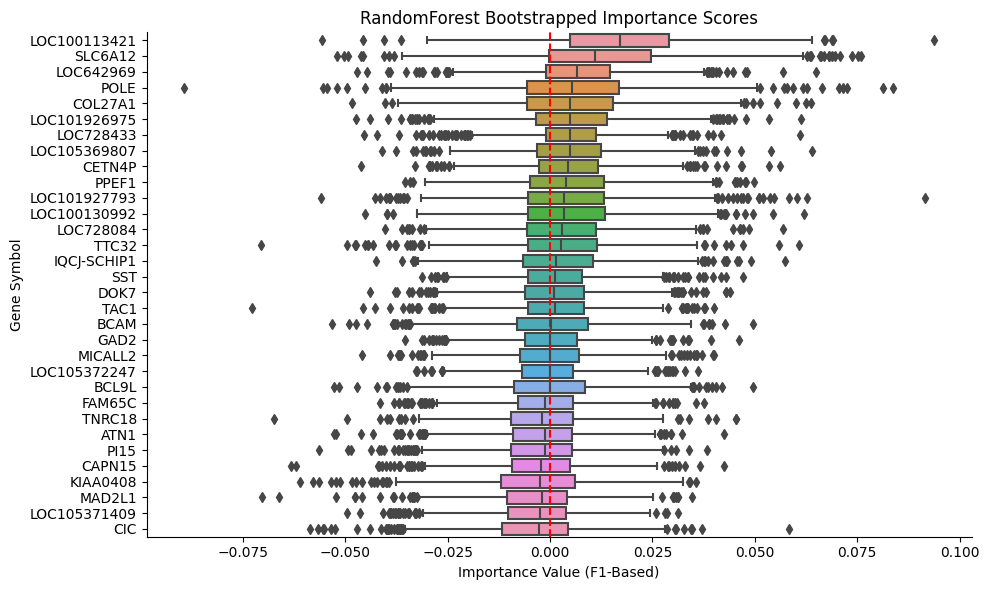

In [236]:
train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)
    clf =  RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

# Plot scores
plt.plot(sorted(train_scores), label = f'Training, Mean = {np.round(np.mean(train_scores),2)}')
plt.plot(sorted(test_scores), label = f'Testing Data, Mean = {np.round(np.mean(test_scores),2)}')
plt.title('Sorted RandomForest Scores')
plt.ylabel('Importance Score (F1)')
plt.xlabel('Iterations')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axhline(np.mean(train_scores),color="gray",linestyle="--")
plt.legend()
plt.show()

coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

gene_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')
gene_list = np.array(ml_df.set_index('rnaseq_profile_id').columns[:-1])

gene_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(gene_list, coefs_mean)}, orient = 'index', columns= ['coef'])
.rename_axis('gene_id')
.reset_index()
.sort_values(by='coef', ascending= False)
)

# Plot importance
sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

gene_ids_ranking
gene_ids_ranking['sem'] = coefs_sem
gene_ids_ranking = gene_ids_ranking.merge(gene_data, on='gene_id')
# gene_ids_ranking

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = gene_ids_ranking['gene_symbol']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('RandomForest Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Gene Symbol')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

## Gradient Boosted

Training on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [1.0, 1.0, 1.0]
Test Scores (F1):  [0.5882, 0.6179, 0.678]
mean Train:  1.0
mean Test:  0.6566
Training std :  0.0
Testing std :  0.0592


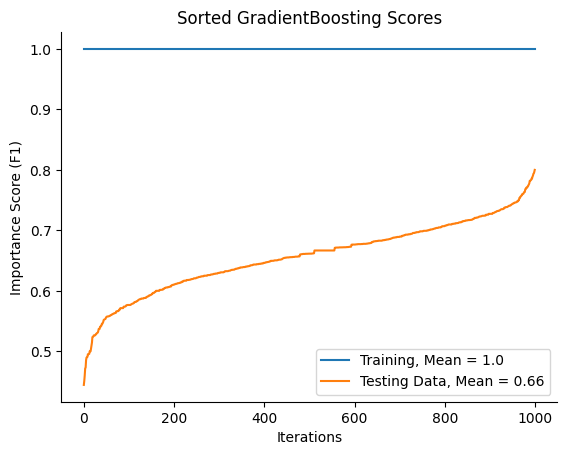

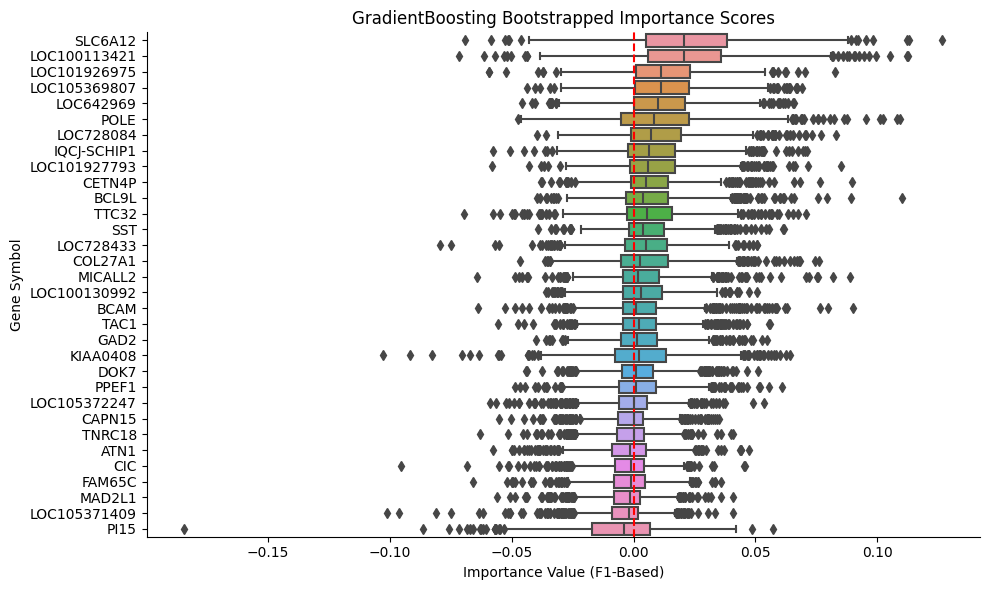

In [237]:
train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)
    clf =  GradientBoostingClassifier(random_state=42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

# Plot scores
plt.plot(sorted(train_scores), label = f'Training, Mean = {np.round(np.mean(train_scores),2)}')
plt.plot(sorted(test_scores), label = f'Testing Data, Mean = {np.round(np.mean(test_scores),2)}')
plt.title('Sorted GradientBoosting Scores')
plt.ylabel('Importance Score (F1)')
plt.xlabel('Iterations')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axhline(np.mean(train_scores),color="gray",linestyle="--")
plt.legend()
plt.show()

coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

gene_data = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')
gene_list = np.array(ml_df.set_index('rnaseq_profile_id').columns[:-1])

gene_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(gene_list, coefs_mean)}, orient = 'index', columns= ['coef'])
.rename_axis('gene_id')
.reset_index()
.sort_values(by='coef', ascending= False)
)

# Plot importance
sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

gene_ids_ranking
gene_ids_ranking['sem'] = coefs_sem
gene_ids_ranking = gene_ids_ranking.merge(gene_data, on='gene_id')
# gene_ids_ranking

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = gene_ids_ranking['gene_symbol']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('GradientBoosting Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Gene Symbol')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

In [ ]:
# Create Boxplot of boostraped F1 Scores on testing data across models.